# Speed Date Analysis

## Project 🚧
The marketing team needs help on a new project. They are experiencing a decrease in the number of matches, and they are trying to find a way to understand what makes people interested into each other.

They decided to run a speed dating experiment with people who had to give Tinder lots of informations about themselves that could ultimately reflect on ther dating profile on the app.

Tinder then gathered the data from this experiment. Each row in the dataset represents one speed date between two people, and indicates wether each of them secretly agreed to go on a second date with the other person.

## Goals 🎯
Use the dataset to understand what makes people interested into each other to go on a second date together:

- You may use descriptive statistics
- You may use visualisations

## Scope of this project 🖼️
Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("data/SpeedDatingData.csv", encoding = 'unicode_escape')

## Important datas
When we saw the data descrition, theses data seems to be important to analyse:

### The general data :
- iid
- pid : partner’s iid number
- gender: Female=0, Male=1
- match: 1=yes, 0=no
- dec_o: decision of partner the night of event
- attr_o: rating by partner the night of the event, for all 6 attributes
- samerace: participant and the partner were the same race. 1= yes, 0=no
- age: age
- age_o : age of partner
- field_cd: code of field of study
- career_c: career coded
- mn_sat: Median SAT score for the undergraduate institution where attended. Taken from Barron’s 25th Edition college profile book.  Proxy for intelligence.
- income: Median household income based on zipcode using the Census Bureau website
- goal: What is your primary goal in participating in this event?

### The attributes the participant thinks important
- imprace: How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?
- imprelig: How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?

Rate the importance of the following attributes on a scale of 1-10 
- attr1_s:  Attractive
- sinc1_s: Sincere
- intel1_s: Intelligent
- fun1_s: Fun
- amb1_s: Ambitious
- shar1_s: Has shared interests/hobbies

Rate your own attributes:
- attr3_s:  Attractive
- sinc3_s: Sincere
- intel3_s: Intelligent
- fun3_s: Fun
- amb3_s: Ambitious

Rate the importance of attribute 


### Interrests:
- sports: Playing sports/ athletics
- tvsports: Watching sports
- excersice: Body building/exercising
- dining: Dining out
- museums: Museums/galleries
- art: Art
- hiking:  Hiking/camping
- gaming: Gaming
- clubbing: Dancing/clubbing
- reading: Reading
- tv: Watching TV
- theater: Theater
- movies: Movies
- concerts: Going to concerts
- music: Music
- shopping: Shopping
- yoga: Yoga/meditation

### Futur:
- you_call: How many have you contacted to set up a date?
- them_cal: How many have contacted you?
- date_3: Have you been on a date with any of your matches?	Yes=1	No=2


In [15]:
dataset = dataset[['iid', 'pid', 'wave', 'gender', 'match', 'dec_o', 'attr_o', 'samerace', 'age', 'age_o', 'field_cd', 'career_c', 'mn_sat', 'income', 'goal', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'you_call', 'them_cal', 'date_3']]

### Number matches per wave
We look at the number of matches per wave to see if any waves are skewed by the fact that people bring a book.

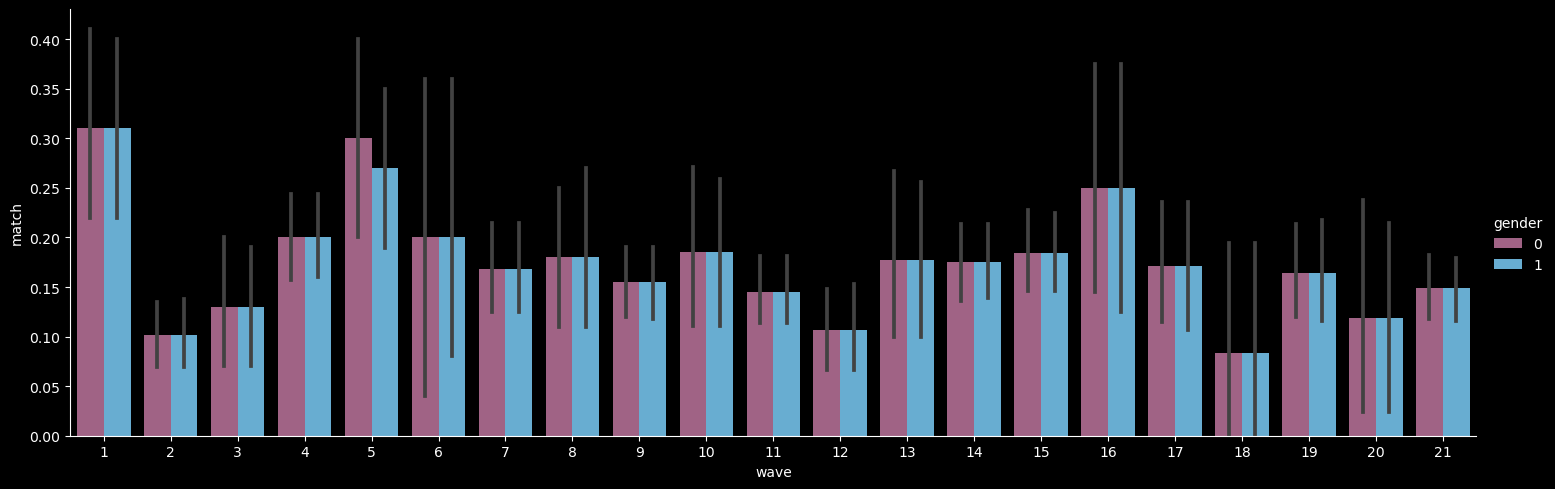

In [32]:
palette = {
    0: '#AA5986',
    1: '#56b3e3'
}
sns.catplot(x="wave", y="match", hue="gender", kind="bar", data=dataset, aspect=3, palette=palette)

We can see that, depending on the wave, the match rate is always between 10% and 30%. We can also see that there is no difference according to gender.

## Number matches in common
We're joining the dates with their partner.

In [122]:
join_dataset = dataset.merge(dataset, left_on='pid', right_on='iid', how='left', suffixes=("", "_partner"))
join_dataset = join_dataset.drop_duplicates(subset=['iid', 'pid', 'iid_partner'])
join_dataset = join_dataset.dropna(subset=["pid"])
# join_dataset have duplicate date a.b & b.a
join_dataset["parter_combination"] = list(zip(join_dataset['iid'], join_dataset['pid']))
join_dataset["parter_combination"]

0            (1, 11.0)
10           (1, 12.0)
20           (1, 13.0)
30           (1, 14.0)
40           (1, 15.0)
              ...     
141014    (552, 526.0)
141036    (552, 527.0)
141058    (552, 528.0)
141080    (552, 529.0)
141102    (552, 530.0)
Name: parter_combination, Length: 8368, dtype: object



## Number of interest in common and number of match

## Correlation of interest

distinguer entre les resultat femmes et homme

Just correlation not causality